In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

In [2]:
ser = Service('../chromedriver/chromedriver.exe')

driver = webdriver.Chrome(service = ser)

In [3]:
url = 'http://youtube-rank.com/board/bbs/board.php?bo_table=youtube'

driver.get(url)

In [5]:
html = driver.page_source

soup = BeautifulSoup(html,'html.parser')
# soup
soup.head()

[<meta charset="utf-8"/>,
 <meta content="no" http-equiv="imagetoolbar"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <title>유튜브 랭킹 1 페이지</title>,
 <link href="http://youtube-rank.com/css/default.css?ver=191202" rel="stylesheet"/>,
 <link href="http://youtube-rank.com/css/bootstrap.css?ver=191202" rel="stylesheet"/>,
 <link href="http://youtube-rank.com/css/nifty.css?ver=191202" rel="stylesheet"/>,
 <link href="http://youtube-rank.com/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=191202" rel="stylesheet"/>,
 <link href="http://youtube-rank.com/css/themes/type-c/theme-well-red.css?ver=191202" rel="stylesheet"/>,
 <link href="http://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=191202" rel="stylesheet"/>,
 <link href="http://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?191202" rel="stylesheet"/>,
 <link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>,
 <link href="/img/apple-touch-icon

In [6]:
#['카테고리','채널명','구독자수','조회수','동영상 수']

In [12]:
chart = soup.select('form > table > tbody > tr')
len(chart)

100

In [17]:
board = chart[0]
board

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="http://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLSWxQF3kaqYMX1MWVVzNkNZaM-3EU551f2orOqykA=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLSWxQF3kaqYMX1MWVVzNkNZaM-3EU551f2orOqykA=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="http://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="http://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="fa 

In [39]:
category = board.select('p.category')[0].text.strip()[1:-1]

In [31]:
name = board.select('h1>a')[0].text.strip()

In [36]:
subscriber = board.select('td.subscriber_cnt')[0].text

In [37]:
view = board.select('td.view_cnt')[0].text

In [38]:
video = board.select('td.video_cnt')[0].text

In [42]:
youtubeRank = []
rank = 1
for board in chart:
    category = board.select('p.category')[0].text.strip()[1:-1]
    name = board.select('h1>a')[0].text.strip()
    subscriber = board.select('td.subscriber_cnt')[0].text
    view = board.select('td.view_cnt')[0].text
    video = board.select('td.video_cnt')[0].text
    
    myList = [rank,category,name,subscriber,view,video]
    youtubeRank.append(myList)
    rank +=1

rankDF = pd.DataFrame(youtubeRank, 
        columns = ['순위','카테고리','채널명','구독자수','조회수','동영상 수'])
rankDF

,순위,카테고리,채널명,구독자수,조회수,동영상 수
0,1,음악/댄스/가수,BLACKPINK,7130만,220억2860만,395개
1,2,음악/댄스/가수,HYBE LABELS,6360만,210억1371만,786개
2,3,음악/댄스/가수,BANGTANTV,6290만,146억8130만,"1,665개"
3,4,음악/댄스/가수,SMTOWN,2970만,234억3321만,"3,841개"
4,5,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개
...,...,...,...,...,...,...
95,96,BJ/인물/연예인,허팝Heopop,385만,33억0441만,"1,912개"
96,97,TV/방송,워크맨-Workman,381만,7억7678만,163개
97,98,음악/댄스/가수,WINNER,381만,12억2780만,461개
98,99,애완/반려동물,크림히어로즈,377만,14억3043만,"1,027개"


In [43]:
rankDF.to_excel('youtube_rank_class_2.xlsx',
               index = False)

In [45]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

In [46]:
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font',family = font_name)

In [47]:
df = pd.read_excel('./youtube_rank_class_2.xlsx')
df.head()

,순위,카테고리,채널명,구독자수,조회수,동영상 수
0,1,음악/댄스/가수,BLACKPINK,7130만,220억2860만,395개
1,2,음악/댄스/가수,HYBE LABELS,6360만,210억1371만,786개
2,3,음악/댄스/가수,BANGTANTV,6290만,146억8130만,"1,665개"
3,4,음악/댄스/가수,SMTOWN,2970만,234억3321만,"3,841개"
4,5,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개


In [48]:
df['카테고리'].value_counts()

음악/댄스/가수     37
키즈/어린이       22
음식/요리/레시피    14
TV/방송        13
뉴스/정치/사회      3
BJ/인물/연예인     3
애완/반려동물       2
해외            1
미분류           1
회사/오피셜        1
패션/미용         1
게임            1
취미/라이프        1
Name: 카테고리, dtype: int64

In [51]:
df['구독자 숫자'] = df['구독자수'].str.replace('만','0000')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    int64 
 1   카테고리    100 non-null    object
 2   채널명     100 non-null    object
 3   구독자수    100 non-null    object
 4   조회수     100 non-null    object
 5   동영상 수   100 non-null    object
 6   구독자 숫자  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [52]:
df['구독자 숫자'] = df['구독자 숫자'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    int64 
 1   카테고리    100 non-null    object
 2   채널명     100 non-null    object
 3   구독자수    100 non-null    object
 4   조회수     100 non-null    object
 5   동영상 수   100 non-null    object
 6   구독자 숫자  100 non-null    int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 5.2+ KB


In [53]:
df.head()

,순위,카테고리,채널명,구독자수,조회수,동영상 수,구독자 숫자
0,1,음악/댄스/가수,BLACKPINK,7130만,220억2860만,395개,71300000
1,2,음악/댄스/가수,HYBE LABELS,6360만,210억1371만,786개,63600000
2,3,음악/댄스/가수,BANGTANTV,6290만,146억8130만,"1,665개",62900000
3,4,음악/댄스/가수,SMTOWN,2970만,234억3321만,"3,841개",29700000
4,5,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


In [59]:
pivot_df = df.pivot_table(values = '구독자 숫자',
              index = '카테고리',
              aggfunc = ['sum','count']              
              )
pivot_df

,sum,count
,구독자 숫자,구독자 숫자
카테고리,,
BJ/인물/연예인,13570000,3
TV/방송,87520000,13
게임,4260000,1
뉴스/정치/사회,20430000,3
미분류,6550000,1
애완/반려동물,8080000,2
음식/요리/레시피,92900000,14
음악/댄스/가수,535880000,37


In [62]:
pivot_df.columns = ['구독자 총합','채널갯수']
pivot_df= pivot_df.reset_index()
pivot_df

,카테고리,구독자 총합,채널갯수
0,BJ/인물/연예인,13570000,3
1,TV/방송,87520000,13
2,게임,4260000,1
3,뉴스/정치/사회,20430000,3
4,미분류,6550000,1
5,애완/반려동물,8080000,2
6,음식/요리/레시피,92900000,14
7,음악/댄스/가수,535880000,37
8,취미/라이프,4000000,1
9,키즈/어린이,163730000,22


In [71]:
pivot_df = pivot_df.sort_values(by = '구독자 총합',ascending = False)
pivot_df= pivot_df.reset_index(drop = True)
pivot_df

,level_0,index,카테고리,구독자 총합,채널갯수
0,0,7,음악/댄스/가수,535880000,37
1,1,9,키즈/어린이,163730000,22
2,2,6,음식/요리/레시피,92900000,14
3,3,1,TV/방송,87520000,13
4,4,3,뉴스/정치/사회,20430000,3
5,5,0,BJ/인물/연예인,13570000,3
6,6,5,애완/반려동물,8080000,2
7,7,11,해외,7810000,1
8,8,4,미분류,6550000,1
9,9,12,회사/오피셜,5950000,1


In [75]:
pivot_df = pivot_df.drop(columns = ['level_0','index'])
pivot_df

,카테고리,구독자 총합,채널갯수
0,음악/댄스/가수,535880000,37
1,키즈/어린이,163730000,22
2,음식/요리/레시피,92900000,14
3,TV/방송,87520000,13
4,뉴스/정치/사회,20430000,3
5,BJ/인물/연예인,13570000,3
6,애완/반려동물,8080000,2
7,해외,7810000,1
8,미분류,6550000,1
9,회사/오피셜,5950000,1


## 파이차트(Pie chart)

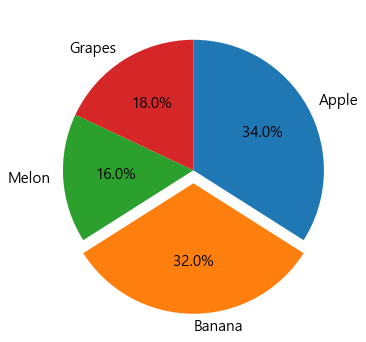

In [94]:
ratio = [34,32,16,18]
labels = ['Apple','Banana','Melon','Grapes']
explodes = [0, 0.1, 0, 0]
#colors = ['', '', '', '']

plt.rcParams['font.size']=15

plt.figure(figsize=(6,6))
plt.pie(ratio, labels = labels,
       autopct = '%.1f%%',
       counterclock = False, startangle=90,
       explode = explodes, 
        #shadow = True
       )
plt.show()

In [102]:
pv_head = pivot_df.head()
pv_head

,카테고리,구독자 총합,채널갯수
0,음악/댄스/가수,535880000,37
1,키즈/어린이,163730000,22
2,음식/요리/레시피,92900000,14
3,TV/방송,87520000,13
4,뉴스/정치/사회,20430000,3


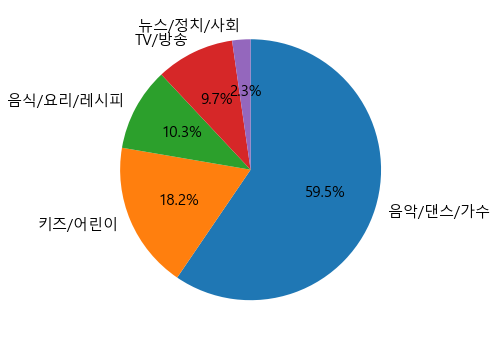

In [103]:
plt.rcParams['font.size']=15
plt.figure(figsize=(6,6))
plt.pie(pv_head['구독자 총합'],
       labels = pv_head['카테고리'],
       counterclock = False, startangle=90,
       autopct = '%.1f%%')
plt.show()